# Trabalho de Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [15]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("algoritmos/")

## Questão 1

In [ ]:
e ai

## Questão 2

In [ ]:
coé

## Questão 3 - Implemente em uma linguagem de programação a sua escolha os algoritmos de ordenação linear CountingSort e BucketSort. Em seguida, trabalhe os itens abaixo.



### a. Analise o comportamento do tempo de execução do algoritmo CountingSort quando o número de elementos da sequência de entrada é aumentado gradativamente. Durante a análise, comente a relação que existe entre o tamanho da sequência de entrada e o elemento de maior valor nessa sequência. Usando dados reais, ilustre graficamente suas conclusões.


In [11]:
from counting_sort import counting_sort
from bucket_sort import bucket_sort

In [68]:
def test_many_arrays(sort_algorithm, size, iterations=128):
    times = np.zeros((iterations,size-2))
    for e in range(2,size):
        for j in range(iterations):
            vetor = np.random.randint(low=0,high=e,size=e)
            times[j,e-2] = sort_algorithm(vetor)[1]
    return np.median(times,axis=0)




<function matplotlib.pyplot.show>

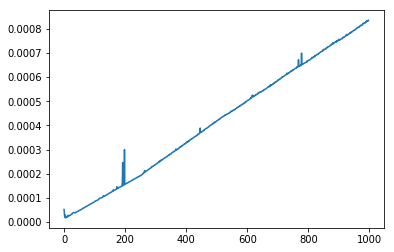

In [69]:
time_counting =  test_many_arrays(counting_sort,1000)
plt.plot(time_counting)
plt.show

## Questão 4

In [ ]:
fala